In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
sns.set(rc={'figure.figsize':(6,6)}) 
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

Set Seed

In [2]:
import random

print ("Random number with seed 30")
random.seed(30)
print ("first Number ", random.randint(25,50))

random.seed(30)
print ("Second Number ", random.randint(25,50))

random.seed(30)
print ("Third Number ", random.randint(25,50))

Random number with seed 30
first Number  42
Second Number  42
Third Number  42


We will need to clean the data a bit to separate the `DisplayText` values. Note that this is the reason for the duplicate rows in the dataset. We can create three different datasets for modeling purposes.

In [3]:
compas = pd.read_csv('Compas_v2.csv') # read in the dataset used for EDA
violent = pd.read_csv('cox-violent-parsed.csv') # read in the dataset with additional predictors

In [4]:
compas.head()

,Unnamed: 0,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted,Age,Age_Group
0,0,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,1992-12-05,...,7,Risk of Violence,-2.08,4,Low,New,1,0,24,18-24
1,1,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,1992-12-05,...,8,Risk of Recidivism,-1.06,2,Low,New,1,0,24,18-24
2,2,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,1992-12-05,...,18,Risk of Failure to Appear,15.00,1,Low,New,1,0,24,18-24
3,3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,1984-09-16,...,7,Risk of Violence,-2.84,2,Low,New,1,0,32,30-34
4,4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,1984-09-16,...,8,Risk of Recidivism,-1.50,1,Low,New,1,0,32,30-34


In [5]:
violent.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


In [6]:
compas["LastName"] = compas["LastName"].str.lower()
compas["FirstName"] = compas["FirstName"].str.lower()
compas.head()

,Unnamed: 0,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted,Age,Age_Group
0,0,50844,57167,51950,PRETRIAL,fisher,kevin,Male,Caucasian,1992-12-05,...,7,Risk of Violence,-2.08,4,Low,New,1,0,24,18-24
1,1,50844,57167,51950,PRETRIAL,fisher,kevin,Male,Caucasian,1992-12-05,...,8,Risk of Recidivism,-1.06,2,Low,New,1,0,24,18-24
2,2,50844,57167,51950,PRETRIAL,fisher,kevin,Male,Caucasian,1992-12-05,...,18,Risk of Failure to Appear,15.00,1,Low,New,1,0,24,18-24
3,3,50848,57174,51956,PRETRIAL,kendall,kevin,Male,Caucasian,1984-09-16,...,7,Risk of Violence,-2.84,2,Low,New,1,0,32,30-34
4,4,50848,57174,51956,PRETRIAL,kendall,kevin,Male,Caucasian,1984-09-16,...,8,Risk of Recidivism,-1.50,1,Low,New,1,0,32,30-34


In [7]:
compas.apply('nunique')

Unnamed: 0                 47124
Person_ID                  14330
AssessmentID               15708
Case_ID                    15084
Agency_Text                    4
LastName                    6993
FirstName                   4887
Sex_Code_Text                  2
Ethnic_Code_Text               8
DateOfBirth                 7167
ScaleSet_ID                    2
ScaleSet                       2
AssessmentReason               1
Language                       2
LegalStatus                    7
CustodyStatus                  6
MaritalStatus                  7
Screening_Date               704
RecSupervisionLevel            4
RecSupervisionLevelText        4
Scale_ID                       3
DisplayText                    3
RawScore                     577
DecileScore                   11
ScoreText                      3
AssessmentType                 2
IsCompleted                    1
IsDeleted                      1
Age                           29
Age_Group                      6
dtype: int

In [8]:
compas.columns

Index(['Unnamed: 0', 'Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text',
       'LastName', 'FirstName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted', 'Age', 'Age_Group'],
      dtype='object')

In [9]:
# Below, we will drop the columns not needed, keeping the column `DisplayText` so we can break off this columns corresponding rows into seperate dataframes for analysis
compas = compas.drop(['Unnamed: 0','AssessmentID','Agency_Text','DateOfBirth','ScaleSet_ID',
                      'AssessmentReason','Language','MaritalStatus','Screening_Date',
                      'AssessmentType', 'IsCompleted', 'IsDeleted','ScaleSet','Scale_ID'], axis=1)

Need to add in prior offenses. We will use the `cox-violent-parced.csv` for this and remove the other columns.

In [10]:
violent.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event'],
      dtype='object')

In [11]:
violent = violent.drop(['id','compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count','days_b_screening_arrest', 
       'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'first', 'last'], axis=1)

In [12]:
violent = violent.rename(columns={'name': 'Name'})

In [13]:
violent.head()

,Name,priors_count,is_violent_recid,v_score_text
0,miguel hernandez,0,0,Low
1,miguel hernandez,0,0,Low
2,michael ryan,0,0,Low
3,kevon dixon,0,1,Low
4,ed philo,4,0,Low


In [14]:
violent['Violence_HighRisk'] = np.where(violent['v_score_text'] == "High", 1, 0)
violent = violent.drop(['v_score_text'], axis=1)
violent.head()

,Name,priors_count,is_violent_recid,Violence_HighRisk
0,miguel hernandez,0,0,0
1,miguel hernandez,0,0,0
2,michael ryan,0,0,0
3,kevon dixon,0,1,0
4,ed philo,4,0,0


In [15]:
violent = violent.drop_duplicates('Name', keep='last')
violent.head()

,Name,priors_count,is_violent_recid,Violence_HighRisk
1,miguel hernandez,0,0,0
3,kevon dixon,0,1,0
8,ed philo,4,0,0
9,marcu brown,1,0,0
10,bouthy pierrelouis,2,0,0


Back to the compas data

In [16]:
# Change the column data types explicitly to strings. 
compas['First'] = compas['FirstName'].astype('str')
compas['Last'] = compas['LastName'].astype('str')

In [17]:
compas['Name'] = compas['First'] + ' ' + compas['Last']
compas = compas.drop(['First','Last','FirstName','LastName'], axis=1)

In [18]:
compas.head()

,Person_ID,Case_ID,Sex_Code_Text,Ethnic_Code_Text,LegalStatus,CustodyStatus,RecSupervisionLevel,RecSupervisionLevelText,DisplayText,RawScore,DecileScore,ScoreText,Age,Age_Group,Name
0,50844,51950,Male,Caucasian,Pretrial,Jail Inmate,1,Low,Risk of Violence,-2.08,4,Low,24,18-24,kevin fisher
1,50844,51950,Male,Caucasian,Pretrial,Jail Inmate,1,Low,Risk of Recidivism,-1.06,2,Low,24,18-24,kevin fisher
2,50844,51950,Male,Caucasian,Pretrial,Jail Inmate,1,Low,Risk of Failure to Appear,15.00,1,Low,24,18-24,kevin fisher
3,50848,51956,Male,Caucasian,Pretrial,Jail Inmate,1,Low,Risk of Violence,-2.84,2,Low,32,30-34,kevin kendall
4,50848,51956,Male,Caucasian,Pretrial,Jail Inmate,1,Low,Risk of Recidivism,-1.50,1,Low,32,30-34,kevin kendall


In [19]:
ror = compas.loc[compas['DisplayText'] == 'Risk of Recidivism'] # Same as before, but w/ 'Risk of Recidivism'
ror = ror.drop(["DisplayText"], axis=1)
ror.head()

,Person_ID,Case_ID,Sex_Code_Text,Ethnic_Code_Text,LegalStatus,CustodyStatus,RecSupervisionLevel,RecSupervisionLevelText,RawScore,DecileScore,ScoreText,Age,Age_Group,Name
1,50844,51950,Male,Caucasian,Pretrial,Jail Inmate,1,Low,-1.06,2,Low,24,18-24,kevin fisher
4,50848,51956,Male,Caucasian,Pretrial,Jail Inmate,1,Low,-1.50,1,Low,32,30-34,kevin kendall
7,50855,51963,Male,African-American,Pretrial,Jail Inmate,4,High,0.18,8,High,22,18-24,daniel dayes
10,50850,51958,Female,African-American,Pretrial,Jail Inmate,2,Medium,-0.53,6,Medium,22,18-24,mikerlie debe
13,50839,51945,Female,African-American,Pretrial,Jail Inmate,1,Low,-1.55,2,Low,31,30-34,stephanie mclaurin


In [20]:
ror = ror.drop_duplicates('Name', keep='last')
ror.head()

,Person_ID,Case_ID,Sex_Code_Text,Ethnic_Code_Text,LegalStatus,CustodyStatus,RecSupervisionLevel,RecSupervisionLevelText,RawScore,DecileScore,ScoreText,Age,Age_Group,Name
1,50844,51950,Male,Caucasian,Pretrial,Jail Inmate,1,Low,-1.06,2,Low,24,18-24,kevin fisher
4,50848,51956,Male,Caucasian,Pretrial,Jail Inmate,1,Low,-1.50,1,Low,32,30-34,kevin kendall
7,50855,51963,Male,African-American,Pretrial,Jail Inmate,4,High,0.18,8,High,22,18-24,daniel dayes
10,50850,51958,Female,African-American,Pretrial,Jail Inmate,2,Medium,-0.53,6,Medium,22,18-24,mikerlie debe
13,50839,51945,Female,African-American,Pretrial,Jail Inmate,1,Low,-1.55,2,Low,31,30-34,stephanie mclaurin


In [21]:
ror.shape

(13963, 14)

In [22]:
ror.isna().sum()

Person_ID                   0
Case_ID                     0
Sex_Code_Text               0
Ethnic_Code_Text            0
LegalStatus                 0
CustodyStatus               0
RecSupervisionLevel         0
RecSupervisionLevelText     0
RawScore                    0
DecileScore                 0
ScoreText                  22
Age                         0
Age_Group                   0
Name                        0
dtype: int64

In [23]:
ror = ror.dropna()
ror.isna().sum()

Person_ID                  0
Case_ID                    0
Sex_Code_Text              0
Ethnic_Code_Text           0
LegalStatus                0
CustodyStatus              0
RecSupervisionLevel        0
RecSupervisionLevelText    0
RawScore                   0
DecileScore                0
ScoreText                  0
Age                        0
Age_Group                  0
Name                       0
dtype: int64

In [24]:
# Make binary column for two-year recidivism risk based on `ScoreText`: Low = 0; Medium, High = 1
ror['Two_Yr_Recidivism'] = np.where(ror['ScoreText'] == "Low", 0, 1)
ror = ror.drop(['ScoreText','RecSupervisionLevel','RecSupervisionLevelText'], axis=1)
ror.head()

,Person_ID,Case_ID,Sex_Code_Text,Ethnic_Code_Text,LegalStatus,CustodyStatus,RawScore,DecileScore,Age,Age_Group,Name,Two_Yr_Recidivism
1,50844,51950,Male,Caucasian,Pretrial,Jail Inmate,-1.06,2,24,18-24,kevin fisher,0
4,50848,51956,Male,Caucasian,Pretrial,Jail Inmate,-1.50,1,32,30-34,kevin kendall,0
7,50855,51963,Male,African-American,Pretrial,Jail Inmate,0.18,8,22,18-24,daniel dayes,1
10,50850,51958,Female,African-American,Pretrial,Jail Inmate,-0.53,6,22,18-24,mikerlie debe,1
13,50839,51945,Female,African-American,Pretrial,Jail Inmate,-1.55,2,31,30-34,stephanie mclaurin,0


In [25]:
# Now an binary for select age groups.
ror['45_or_Older'] = np.where(ror['Age'] >= 45, 1, 0)
ror['Below_25'] = np.where(ror['Age'] <= 24, 1, 0)
ror['25_or_Older'] = np.where(ror['Age'] >= 25, 1, 0)
ror = ror.drop(['Age_Group'], axis=1)
ror.head()

,Person_ID,Case_ID,Sex_Code_Text,Ethnic_Code_Text,LegalStatus,CustodyStatus,RawScore,DecileScore,Age,Name,Two_Yr_Recidivism,45_or_Older,Below_25,25_or_Older
1,50844,51950,Male,Caucasian,Pretrial,Jail Inmate,-1.06,2,24,kevin fisher,0,0,1,0
4,50848,51956,Male,Caucasian,Pretrial,Jail Inmate,-1.50,1,32,kevin kendall,0,0,0,1
7,50855,51963,Male,African-American,Pretrial,Jail Inmate,0.18,8,22,daniel dayes,1,0,1,0
10,50850,51958,Female,African-American,Pretrial,Jail Inmate,-0.53,6,22,mikerlie debe,1,0,1,0
13,50839,51945,Female,African-American,Pretrial,Jail Inmate,-1.55,2,31,stephanie mclaurin,0,0,0,1


In [26]:
ror['Gender_Male'] = np.where(ror['Sex_Code_Text'] == "Male", 1, 0)
ror = ror.drop(['Sex_Code_Text'], axis=1)
ror.head()

,Person_ID,Case_ID,Ethnic_Code_Text,LegalStatus,CustodyStatus,RawScore,DecileScore,Age,Name,Two_Yr_Recidivism,45_or_Older,Below_25,25_or_Older,Gender_Male
1,50844,51950,Caucasian,Pretrial,Jail Inmate,-1.06,2,24,kevin fisher,0,0,1,0,1
4,50848,51956,Caucasian,Pretrial,Jail Inmate,-1.50,1,32,kevin kendall,0,0,0,1,1
7,50855,51963,African-American,Pretrial,Jail Inmate,0.18,8,22,daniel dayes,1,0,1,0,1
10,50850,51958,African-American,Pretrial,Jail Inmate,-0.53,6,22,mikerlie debe,1,0,1,0,0
13,50839,51945,African-American,Pretrial,Jail Inmate,-1.55,2,31,stephanie mclaurin,0,0,0,1,0


In [27]:
ror.Ethnic_Code_Text[ror.Ethnic_Code_Text == 'Caucasian'] = 'Other' 
ror.Ethnic_Code_Text[ror.Ethnic_Code_Text == 'Oriental'] = 'Asian' 
ror.Ethnic_Code_Text[ror.Ethnic_Code_Text == 'Arabic'] = 'Other' 
ror.head()

,Person_ID,Case_ID,Ethnic_Code_Text,LegalStatus,CustodyStatus,RawScore,DecileScore,Age,Name,Two_Yr_Recidivism,45_or_Older,Below_25,25_or_Older,Gender_Male
1,50844,51950,Other,Pretrial,Jail Inmate,-1.06,2,24,kevin fisher,0,0,1,0,1
4,50848,51956,Other,Pretrial,Jail Inmate,-1.50,1,32,kevin kendall,0,0,0,1,1
7,50855,51963,African-American,Pretrial,Jail Inmate,0.18,8,22,daniel dayes,1,0,1,0,1
10,50850,51958,African-American,Pretrial,Jail Inmate,-0.53,6,22,mikerlie debe,1,0,1,0,0
13,50839,51945,African-American,Pretrial,Jail Inmate,-1.55,2,31,stephanie mclaurin,0,0,0,1,0


In [95]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

categorical_variables = ror.select_dtypes(
    ['object', 'category']).columns.tolist()

numerical_variables = ror.select_dtypes(include=np.number)

# 25 largest by count grouped medians
def means_by_category(col_group, col_calc):
    ror.groupby(col_group)[col_calc].mean().nlargest(25).plot(kind='barh', figsize=(10,10))
    sns.mpl.pyplot.xlabel('Average values for variable {}'.format(col_calc))

interact(means_by_category, col_group=categorical_variables, col_calc=numerical_variables);

interactive(children=(Dropdown(description='col_group', options=('Ethnic_Code_Text', 'Name'), value='Ethnic_Co…

In [28]:
# Dummies for race variable
Ethnic_Code_Text_dummies = pd.get_dummies(
                                    ror['Ethnic_Code_Text'], 
                                    drop_first=False,
                                    dtype="int64"
)
Ethnic_Code_Text_dummies.head()

,African-American,Asian,Hispanic,Native American,Other
1,0,0,0,0,1
4,0,0,0,0,1
7,1,0,0,0,0
10,1,0,0,0,0
13,1,0,0,0,0


In [29]:
ror = pd.concat([Ethnic_Code_Text_dummies, ror], axis=1)
ror.head()

,African-American,Asian,Hispanic,Native American,Other,Person_ID,Case_ID,Ethnic_Code_Text,LegalStatus,CustodyStatus,RawScore,DecileScore,Age,Name,Two_Yr_Recidivism,45_or_Older,Below_25,25_or_Older,Gender_Male
1,0,0,0,0,1,50844,51950,Other,Pretrial,Jail Inmate,-1.06,2,24,kevin fisher,0,0,1,0,1
4,0,0,0,0,1,50848,51956,Other,Pretrial,Jail Inmate,-1.50,1,32,kevin kendall,0,0,0,1,1
7,1,0,0,0,0,50855,51963,African-American,Pretrial,Jail Inmate,0.18,8,22,daniel dayes,1,0,1,0,1
10,1,0,0,0,0,50850,51958,African-American,Pretrial,Jail Inmate,-0.53,6,22,mikerlie debe,1,0,1,0,0
13,1,0,0,0,0,50839,51945,African-American,Pretrial,Jail Inmate,-1.55,2,31,stephanie mclaurin,0,0,0,1,0


In [30]:
# Dummies for `LegalStatus`
LegalStatus_dummies = pd.get_dummies(
                                    ror['LegalStatus'], 
                                    drop_first=False,
                                    dtype="int64"
)
ror = ror.drop(['LegalStatus'], axis=1)
LegalStatus_dummies = LegalStatus_dummies.rename(columns={'Other': 'Other_LegalStatus'})
LegalStatus_dummies.head()

,Conditional Release,Deferred Sentencing,Other_LegalStatus,Parole Violator,Post Sentence,Pretrial,Probation Violator
1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
7,0,0,0,0,0,1,0
10,0,0,0,0,0,1,0
13,0,0,0,0,0,1,0


In [31]:
ror = pd.concat([LegalStatus_dummies, ror], axis=1)
ror.head()

,Conditional Release,Deferred Sentencing,Other_LegalStatus,Parole Violator,Post Sentence,Pretrial,Probation Violator,African-American,Asian,Hispanic,...,CustodyStatus,RawScore,DecileScore,Age,Name,Two_Yr_Recidivism,45_or_Older,Below_25,25_or_Older,Gender_Male
1,0,0,0,0,0,1,0,0,0,0,...,Jail Inmate,-1.06,2,24,kevin fisher,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,0,...,Jail Inmate,-1.50,1,32,kevin kendall,0,0,0,1,1
7,0,0,0,0,0,1,0,1,0,0,...,Jail Inmate,0.18,8,22,daniel dayes,1,0,1,0,1
10,0,0,0,0,0,1,0,1,0,0,...,Jail Inmate,-0.53,6,22,mikerlie debe,1,0,1,0,0
13,0,0,0,0,0,1,0,1,0,0,...,Jail Inmate,-1.55,2,31,stephanie mclaurin,0,0,0,1,0


In [32]:
# Dummies for `CustodyStatus`
CustodyStatus_dummies = pd.get_dummies(
                                    ror['CustodyStatus'], 
                                    drop_first=False,
                                    dtype="int64"
)
ror = ror.drop(['CustodyStatus'], axis=1)
CustodyStatus_dummies.head()

,Jail Inmate,Parole,Pretrial Defendant,Prison Inmate,Probation,Residential Program
1,1,0,0,0,0,0
4,1,0,0,0,0,0
7,1,0,0,0,0,0
10,1,0,0,0,0,0
13,1,0,0,0,0,0


In [33]:
ror = pd.concat([CustodyStatus_dummies, ror], axis=1)
ror.head()

,Jail Inmate,Parole,Pretrial Defendant,Prison Inmate,Probation,Residential Program,Conditional Release,Deferred Sentencing,Other_LegalStatus,Parole Violator,...,Ethnic_Code_Text,RawScore,DecileScore,Age,Name,Two_Yr_Recidivism,45_or_Older,Below_25,25_or_Older,Gender_Male
1,1,0,0,0,0,0,0,0,0,0,...,Other,-1.06,2,24,kevin fisher,0,0,1,0,1
4,1,0,0,0,0,0,0,0,0,0,...,Other,-1.50,1,32,kevin kendall,0,0,0,1,1
7,1,0,0,0,0,0,0,0,0,0,...,African-American,0.18,8,22,daniel dayes,1,0,1,0,1
10,1,0,0,0,0,0,0,0,0,0,...,African-American,-0.53,6,22,mikerlie debe,1,0,1,0,0
13,1,0,0,0,0,0,0,0,0,0,...,African-American,-1.55,2,31,stephanie mclaurin,0,0,0,1,0


In [34]:
ror.dtypes

Jail Inmate              int64
Parole                   int64
Pretrial Defendant       int64
Prison Inmate            int64
Probation                int64
Residential Program      int64
Conditional Release      int64
Deferred Sentencing      int64
Other_LegalStatus        int64
Parole Violator          int64
Post Sentence            int64
Pretrial                 int64
Probation Violator       int64
African-American         int64
Asian                    int64
Hispanic                 int64
Native American          int64
Other                    int64
Person_ID                int64
Case_ID                  int64
Ethnic_Code_Text        object
RawScore               float64
DecileScore              int64
Age                      int64
Name                    object
Two_Yr_Recidivism        int32
45_or_Older              int32
Below_25                 int32
25_or_Older              int32
Gender_Male              int32
dtype: object

In [35]:
violent.dtypes

Name                 object
priors_count          int64
is_violent_recid      int64
Violence_HighRisk     int32
dtype: object

In [36]:
# Now merge `violent` to `ror`
ror_merge = pd.merge(ror, violent, on='Name', how='left')
ror_merge.head()

,Jail Inmate,Parole,Pretrial Defendant,Prison Inmate,Probation,Residential Program,Conditional Release,Deferred Sentencing,Other_LegalStatus,Parole Violator,...,Age,Name,Two_Yr_Recidivism,45_or_Older,Below_25,25_or_Older,Gender_Male,priors_count,is_violent_recid,Violence_HighRisk
0,1,0,0,0,0,0,0,0,0,0,...,24,kevin fisher,0,0,1,0,1,NaN,NaN,NaN
1,1,0,0,0,0,0,0,0,0,0,...,32,kevin kendall,0,0,0,1,1,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,22,daniel dayes,1,0,1,0,1,1.0,1.0,1.0
3,1,0,0,0,0,0,0,0,0,0,...,22,mikerlie debe,1,0,1,0,0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,31,stephanie mclaurin,0,0,0,1,0,0.0,0.0,0.0


In [37]:
ror_merge.dtypes

Jail Inmate              int64
Parole                   int64
Pretrial Defendant       int64
Prison Inmate            int64
Probation                int64
Residential Program      int64
Conditional Release      int64
Deferred Sentencing      int64
Other_LegalStatus        int64
Parole Violator          int64
Post Sentence            int64
Pretrial                 int64
Probation Violator       int64
African-American         int64
Asian                    int64
Hispanic                 int64
Native American          int64
Other                    int64
Person_ID                int64
Case_ID                  int64
Ethnic_Code_Text        object
RawScore               float64
DecileScore              int64
Age                      int64
Name                    object
Two_Yr_Recidivism        int32
45_or_Older              int32
Below_25                 int32
25_or_Older              int32
Gender_Male              int32
priors_count           float64
is_violent_recid       float64
Violence

In [38]:
ror_merge.isna().sum()

Jail Inmate               0
Parole                    0
Pretrial Defendant        0
Prison Inmate             0
Probation                 0
Residential Program       0
Conditional Release       0
Deferred Sentencing       0
Other_LegalStatus         0
Parole Violator           0
Post Sentence             0
Pretrial                  0
Probation Violator        0
African-American          0
Asian                     0
Hispanic                  0
Native American           0
Other                     0
Person_ID                 0
Case_ID                   0
Ethnic_Code_Text          0
RawScore                  0
DecileScore               0
Age                       0
Name                      0
Two_Yr_Recidivism         0
45_or_Older               0
Below_25                  0
25_or_Older               0
Gender_Male               0
priors_count           5504
is_violent_recid       5504
Violence_HighRisk      5504
dtype: int64

In [39]:
ror_merge = ror_merge.dropna()
ror_merge.isna().sum()

Jail Inmate            0
Parole                 0
Pretrial Defendant     0
Prison Inmate          0
Probation              0
Residential Program    0
Conditional Release    0
Deferred Sentencing    0
Other_LegalStatus      0
Parole Violator        0
Post Sentence          0
Pretrial               0
Probation Violator     0
African-American       0
Asian                  0
Hispanic               0
Native American        0
Other                  0
Person_ID              0
Case_ID                0
Ethnic_Code_Text       0
RawScore               0
DecileScore            0
Age                    0
Name                   0
Two_Yr_Recidivism      0
45_or_Older            0
Below_25               0
25_or_Older            0
Gender_Male            0
priors_count           0
is_violent_recid       0
Violence_HighRisk      0
dtype: int64

In [40]:
ror_merge.shape, ror.shape, violent.shape

((8437, 33), (13941, 30), (10855, 4))

In [41]:
ror_merge.head()

,Jail Inmate,Parole,Pretrial Defendant,Prison Inmate,Probation,Residential Program,Conditional Release,Deferred Sentencing,Other_LegalStatus,Parole Violator,...,Age,Name,Two_Yr_Recidivism,45_or_Older,Below_25,25_or_Older,Gender_Male,priors_count,is_violent_recid,Violence_HighRisk
1,1,0,0,0,0,0,0,0,0,0,...,32,kevin kendall,0,0,0,1,1,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,22,daniel dayes,1,0,1,0,1,1.0,1.0,1.0
3,1,0,0,0,0,0,0,0,0,0,...,22,mikerlie debe,1,0,1,0,0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,31,stephanie mclaurin,0,0,0,1,0,0.0,0.0,0.0
5,1,0,0,0,0,0,0,0,0,0,...,32,terrance holland,1,0,0,1,1,20.0,0.0,0.0


In [42]:
# Write out to view dataset
ror_merge.to_csv("Compas_cleaned_modeling.csv", sep=',')

In [43]:
ror_merge.columns

Index(['Jail Inmate', 'Parole', 'Pretrial Defendant', 'Prison Inmate',
       'Probation', 'Residential Program', 'Conditional Release',
       'Deferred Sentencing', 'Other_LegalStatus', 'Parole Violator',
       'Post Sentence', 'Pretrial', 'Probation Violator', 'African-American',
       'Asian', 'Hispanic', 'Native American', 'Other', 'Person_ID', 'Case_ID',
       'Ethnic_Code_Text', 'RawScore', 'DecileScore', 'Age', 'Name',
       'Two_Yr_Recidivism', '45_or_Older', 'Below_25', '25_or_Older',
       'Gender_Male', 'priors_count', 'is_violent_recid', 'Violence_HighRisk'],
      dtype='object')

In [44]:
ror_merge_ = ror_merge.copy()

In [45]:
ror_reduced = ror_merge_.drop(['Name', 'Jail Inmate', 'Parole', 'Pretrial Defendant', 
                            'Prison Inmate', 'Residential Program', 'Conditional Release', 
                            'Deferred Sentencing', 'Other_LegalStatus', 'Post Sentence', 'Pretrial', 
                            'Person_ID', 'Case_ID','DecileScore','Probation','Age',
                            'is_violent_recid','Ethnic_Code_Text','RawScore'], axis=1)

In [46]:
ror_reduced.head()

,Parole Violator,Probation Violator,African-American,Asian,Hispanic,Native American,Other,Two_Yr_Recidivism,45_or_Older,Below_25,25_or_Older,Gender_Male,priors_count,Violence_HighRisk
1,0,0,0,0,0,0,1,0,0,0,1,1,0.0,0.0
2,0,0,1,0,0,0,0,1,0,1,0,1,1.0,1.0
3,0,0,1,0,0,0,0,1,0,1,0,0,0.0,0.0
4,0,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0
5,0,0,0,0,1,0,0,1,0,0,1,1,20.0,0.0


In [47]:
ror_reduced.shape

(8437, 14)

In [48]:
ror_reduced.dtypes

Parole Violator         int64
Probation Violator      int64
African-American        int64
Asian                   int64
Hispanic                int64
Native American         int64
Other                   int64
Two_Yr_Recidivism       int32
45_or_Older             int32
Below_25                int32
25_or_Older             int32
Gender_Male             int32
priors_count          float64
Violence_HighRisk     float64
dtype: object

In [49]:
from ipywidgets import interact, fixed

#Create our plotting function
def plotRecidivismPercent(df, col):
    #Check out what average recidivism is for each potential value in a collumn
    ror_reduced.groupby(col).agg({'Two_Yr_Recidivism':np.mean}).plot.barh()

#Let's look at all columns (you might want to drop numeric columns 
#that aren't binary but you can also just ignore that graph)
columns_to_plot = ror_reduced.drop('Two_Yr_Recidivism',axis=1).columns
interact(plotRecidivismPercent, 
         col=columns_to_plot, df=fixed(ror_reduced));

interactive(children=(Dropdown(description='col', options=('Parole Violator', 'Probation Violator', 'African-A…

[Text(0, 0, 'Other'),
 Text(0, 0, 'African-American'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Native American')]

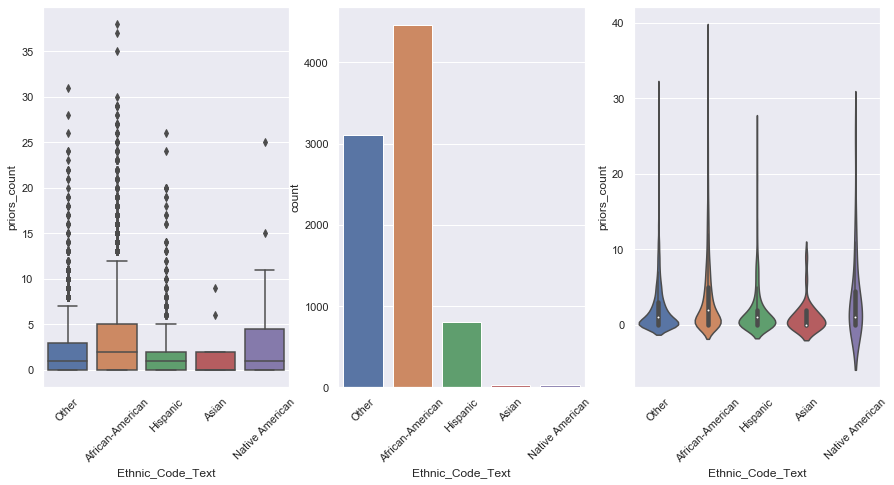

In [92]:
fig = plt.figure(figsize = (15,7))

ax1 = fig.add_subplot(1,3,1)
sns.boxplot(data = ror_merge, x = 'Ethnic_Code_Text', y = 'priors_count' , ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)

ax2 = fig.add_subplot(1,3,2)
sns.countplot(data = ror_merge, x = 'Ethnic_Code_Text', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)

ax3 = fig.add_subplot(1,3,3)
sns.violinplot(data = ror_merge, x = 'Ethnic_Code_Text', y = 'priors_count' , ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=45)


Modeling: Logistic Regression and KNN Classification.

In [50]:
#Get our data into the right format
X = ror_reduced.drop('Two_Yr_Recidivism', axis=1)
Y = ror_reduced['Two_Yr_Recidivism']
X_tr, X_test, Y_tr, Y_test = train_test_split(X,Y, test_size = 0.2)

In [51]:
X_tr.shape, X_test.shape, Y_tr.shape, Y_test.shape

((6749, 13), (1688, 13), (6749,), (1688,))

In [52]:
#Instantiate our logistic regression model
logreg = LogisticRegression()

#Fit our training data
logreg.fit(X_tr, Y_tr)

#Predict on our test data
predictions = logreg.predict(X_test)

predictions[:10]

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [53]:
#Check accuracy
print("Accuracy: ", (predictions == Y_test).mean())

Accuracy:  0.7286729857819905


In [54]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
cross_val_score(logreg, X, Y, scoring="accuracy", 
                cv=10).mean()

0.7352203538479702

In [55]:
logreg = LogisticRegression()
cross_val_score(logreg, X, Y, scoring="roc_auc", 
                cv=10).mean()

0.810809121882418

In [56]:
logreg = LogisticRegression()

#Fit our training data
logreg.fit(X_tr, Y_tr)

#Predict on our test data
for col in ['African-American', 'Asian', 'Hispanic', 'Native American', 'Other']:
    predictions = logreg.predict(X_test[X_test[col] == 1])
    print("Accuracy (%s): "%col, (predictions == Y_test[X_test[col] == 1]).mean())

Accuracy (African-American):  0.7114317425083241
Accuracy (Asian):  0.8333333333333334
Accuracy (Hispanic):  0.8192090395480226
Accuracy (Native American):  0.5714285714285714
Accuracy (Other):  0.7286432160804021


In [96]:
KNN_Class = KNeighborsClassifier(n_neighbors=5,weights="uniform")

#Fit our training data
KNN_Class.fit(X_tr, Y_tr)

#Predict on our test data
for col in ['African-American', 'Asian', 'Hispanic', 'Native American', 'Other']:
    predictions = KNN_Class.predict(X_test[X_test[col] == 1])
    print("Accuracy (%s): "%col, (predictions == Y_test[X_test[col] == 1]).mean())

Accuracy (African-American):  0.6981132075471698
Accuracy (Asian):  0.8333333333333334
Accuracy (Hispanic):  0.8192090395480226
Accuracy (Native American):  0.7142857142857143
Accuracy (Other):  0.7135678391959799


**Cross-Validation**

Cross-Validation w/ various classification based methods and their accuracy.

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

#make a function that does cross validation for us without having to retype it each time

def evaluate_model(estimator):
    cv_results = cross_validate(estimator,
                    X=X_tr,
                    y=Y_tr,
                    scoring="r2",
                          n_jobs=-1, cv=3,
                     return_train_score=True)
    return pd.DataFrame(cv_results).abs().mean().to_dict()

In [58]:
results = {}  #make an empty dictionary to save results.

In [100]:
# a few other kinds of regression algorithms
# read up more on the scikit learn page or look up help function

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

logreg = LogisticRegression()
ridge = Ridge()
LDA = LinearDiscriminantAnalysis()
KNN_Class = KNeighborsClassifier(n_neighbors=5,weights="uniform")
Tree = DecisionTreeClassifier(max_depth=3)

In [101]:
results["Logistic Regression"] = evaluate_model(logreg)
results["Bayesian Ridge"] = evaluate_model(ridge)
results["LDA"] = evaluate_model(LDA)
results["KNN_Class"] = evaluate_model(KNN_Class)
results["Tree"] = evaluate_model(Tree)

pd.DataFrame.from_dict(results).T

,fit_time,score_time,test_score,train_score
Bayesian Ridge,0.009642,0.001328,0.257562,0.260487
LDA,0.022938,0.000998,0.081649,0.074534
KNN_Class,0.009998,0.096077,0.242254,0.195149
Tree,0.010818,0.001995,0.118391,0.111280
Logistic Regression,0.012643,0.006851,0.053197,0.052012


SVM Methods for comparison for multiclass.

In [74]:
from sklearn.svm import SVC, SVR
estimator_svm =  SVC()
estimator_svm.fit(X_tr, Y_tr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [75]:
estimator_svm.predict(X_test)[:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [79]:
ror_svm = ror_merge_.drop(['Name', 'Jail Inmate', 'Parole', 'Pretrial Defendant', 
                            'Prison Inmate', 'Residential Program', 'Conditional Release', 
                            'Deferred Sentencing', 'Other_LegalStatus', 'Post Sentence', 'Pretrial', 
                            'Person_ID', 'Case_ID','Probation','is_violent_recid','African-American', 
                            'Asian','Hispanic', 'Native American', 'Other'], axis=1)
ror_svm.head()

,Parole Violator,Probation Violator,Ethnic_Code_Text,RawScore,DecileScore,Age,Two_Yr_Recidivism,45_or_Older,Below_25,25_or_Older,Gender_Male,priors_count,Violence_HighRisk
1,0,0,Other,-1.50,1,32,0,0,0,1,1,0.0,0.0
2,0,0,African-American,0.18,8,22,1,0,1,0,1,1.0,1.0
3,0,0,African-American,-0.53,6,22,1,0,1,0,0,0.0,0.0
4,0,0,African-American,-1.55,2,31,0,0,0,1,0,0.0,0.0
5,0,0,Hispanic,0.71,10,32,1,0,0,1,1,20.0,0.0


In [65]:
ror_svm.head()

,Parole Violator,Probation Violator,Ethnic_Code_Text,RawScore,DecileScore,Age,Two_Yr_Recidivism,45_or_Older,Below_25,25_or_Older,Gender_Male,priors_count,Violence_HighRisk
1,0,0,Other,-1.50,1,32,0,0,0,1,1,0.0,0.0
2,0,0,African-American,0.18,8,22,1,0,1,0,1,1.0,1.0
3,0,0,African-American,-0.53,6,22,1,0,1,0,0,0.0,0.0
4,0,0,African-American,-1.55,2,31,0,0,0,1,0,0.0,0.0
5,0,0,Hispanic,0.71,10,32,1,0,0,1,1,20.0,0.0


In [66]:
ror_svm.Ethnic_Code_Text[ror_svm.Ethnic_Code_Text == 'Other'] = 0
ror_svm.Ethnic_Code_Text[ror_svm.Ethnic_Code_Text == 'African-American'] = 1 
ror_svm.Ethnic_Code_Text[ror_svm.Ethnic_Code_Text == 'Hispanic'] = 2 
ror_svm.Ethnic_Code_Text[ror_svm.Ethnic_Code_Text == 'Asian'] = 3
ror_svm.Ethnic_Code_Text[ror_svm.Ethnic_Code_Text == 'Native American'] = 4 
ror_svm.Ethnic_Code_Text.unique()

array([0, 1, 2, 3, 4], dtype=object)

In [67]:
X = ror_svm[['priors_count','RawScore']]
y = ror_svm['Ethnic_Code_Text']

X.shape, y.shape

((8437, 2), (8437,))

In [68]:
X['RawScore'].dtype

dtype('float64')

In [69]:
X['priors_count'] = X['priors_count'].astype(int)

In [70]:
X = X.to_numpy()

In [71]:
y = y.astype(int)
y = y.to_numpy()

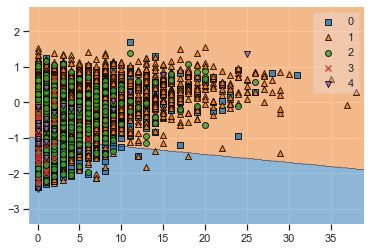

In [72]:
estimator_svm_linear = SVC(kernel="linear")
estimator_svm_linear.fit(X, y)

plot_decision_regions(X, y, clf=estimator_svm_linear);